# Differentialgleichungen

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor der Lektion am Donnerstag durchgearbeitet werden. Hier lernst du die einfachste Lösungsmethode für gewöhnliche Differentialgleichungen kennen, das **Euler-Verfahren**.

## Gewöhnliche Differentialgleichungen

Die **Differentialgleichung** (DGL) ist ein mathematisches Werkzeug, das verwendet wird, um den Zusammenhang zwischen einer Funktion und ihrer Ableitung zu beschreiben. Im Wesentlichen ist es eine Gleichung, die eine unbekannte Funktion und ihre Ableitung(en) enthält.

Differentialgleichungen sind in vielen Bereichen der Physik, der Natur- und Ingenieurwissenschaften sowie anderen Wissenschaften wie der Ökonomie von entscheidender Bedeutung. Sie werden dazu verwendet, mathematische Modelle zu erstellen, die das Verhalten von dynamischen Systemen beschreiben. Solche Systeme sind aus dem Modul **Systeme und Modelle der Physik** bekannt. Dort wird das Tool **Stella** verwendet, um Differentialgleichungssysteme zu modellieren und zu lösen.

Eine **gewöhnliche Differentialgleichung** (engl. *ordinary differential equation*, ODE) ist eine Differentialgleichung, in der die gesuchte Funktion nur von einer Variablen abhängt, meist $t$ oder $x$ genannt.

Wikipedia:
- [Differentialgleichung](https://de.wikipedia.org/wiki/Differentialgleichung)
- [Gewöhnliche Differentialgleichung](https://de.wikipedia.org/wiki/Gew%C3%B6hnliche_Differentialgleichung)

## Euler-Verfahren


> Das eulersche Polygonzugverfahren oder explizite Euler-Verfahren (auch Euler-Cauchy-Verfahren oder Euler-vorwärts-Verfahren) ist das einfachste Verfahren zur numerischen Lösung eines Anfangswertproblems. [Explizites Euler-Verfahren - Wikipedia](https://de.wikipedia.org/wiki/Explizites_Euler-Verfahren)

Das folgende Video erklärt das Euler-Verfahren:

- ["Euler-Verfahren" - Kochrezepte für Mathematik](https://www.youtube.com/watch?v=EhyNxBeNZuM)

In dem Video werden DGL der Form

$$ \frac{dy}{dx} = f(x, y) \quad\text{mit}\quad y(x_0) = y_0 $$

behandelt. Das heisst die abhängige Variable (gesuchte Funktion) heisst $y$ und die unabhängige Variable heisst $x$.

Weil DGL in den Naturwissenschaften häufig zeitlich dynamische Systeme beschreiben und auch SciPy $t$ statt $x$ verwendet, nehmen wir die Zeit $t$ als unabhängige Variable, also $x\to t$,

$$ \frac{dy}{dt} = f(t, y) \quad\text{mit}\quad y(t_0) = y_0 $$

Die Formel für das Euler-Verfahren ist aber die gleiche.

## Arbeitsauftrag

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


### Aufgabe 1

#### a) Verfahren beschreiben

Schreibe die benötigten Schritte für das Euler-Verfahren auf.

Das Euler-Verfahren besteht aus den folgenden Schritten:

1. Schreibe die Differentialgleichung in der Form $y' = f(t, y)$.
2. Wähle eine kleine Schrittweite $h$.
3. Wähle einen Anfangswert $(t_0, y_0)$.
4. Berechne den nächsten Wert $y_1$ mit der Formel $y_1 = y_0 + h \cdot f(t_0, y_0)$
5. Setze $t_0$ auf $t_1 = t_0 + h$ und $y_0$ auf $y_1$
6. Wiederhole die Schritte 4 und 5 so lange, bis die gewünschte Anzahl an Schritten erreicht ist oder eine bestimmtes Abbruchkriterium erfüllt ist.


#### b) Beispiel vorbereiten


Als Beispiel nehmen wir die Differentialgleichung

$$ y'(t) = 3y(t) - e^{2t} $$

die auch im Video vorkommt. Definiere also die Funktion `f(t, y)`, welche für den Funktionswert $y$ an der Stelle $t$ die Ableitung $y'(t)$ berechnet.

In [2]:
def f(t, y):
    return 3 * y - np.exp(2 * t)


#### c) Verfahren implementieren

Programmiere nun eine Funktion `euler(f, y0, t0, tend, h)`, die als Argumente die Funktion `f`, den Startwert `y0`, den Startpunkt `t0`, die Obergrenze `tend` und die Schrittweite `h` nimmt, und die berechneten $t$- und $y$-Werte als zwei NumPy-Arrays zurückliefert.

In [3]:
def euler(f, y0, t0, tend, h):
    """Euler-Verfahren für DGL 1. Ordung"""
    t, y = t0, y0
    ts, ys = [t], [y]
    while t <= tend:
        y = y + h * f(t, y)
        t = t + h
        ts.append(t)
        ys.append(y)
    return np.array(ts), np.array(ys)


#### d) Funktionstest


Verifiziere deine Funktion mit dem Beispiel aus b) mit der Anfangsbedingung $y(0.1) = 1$, das heisst $(t_0, y_0) = (0.1, 1)$.

Löse dazu die Gleichung im Bereich $0.1 \leq t \leq 1.75$ mit der Schrittweite $h = 0.01$.

Erwartetes Resultat: $y(1.75) \approx 1.439616$.

In [4]:
t0 = 0.1
y0 = 1
tend = 1.75
h = 0.01

t, y = euler(f, y0, t0, tend, h)

print(f"y({t[-1]:.6f}) = {y[-1]:.6f}")


y(1.750000) = 1.439616


#### e) Darstellung

Stelle das Ergebnis in einem Diagramm dar und vergleiche es mit der analytischen Lösung

$$ y(t) = e^{2t} - 0.164019 e^{3t} \,, $$

die [Wolfram|Alpha berechnet](https://www.wolframalpha.com/input?i=y%27+%3D+3+*+y+-+exp%282+*+t%29+with+y%280.1%29%3D1).

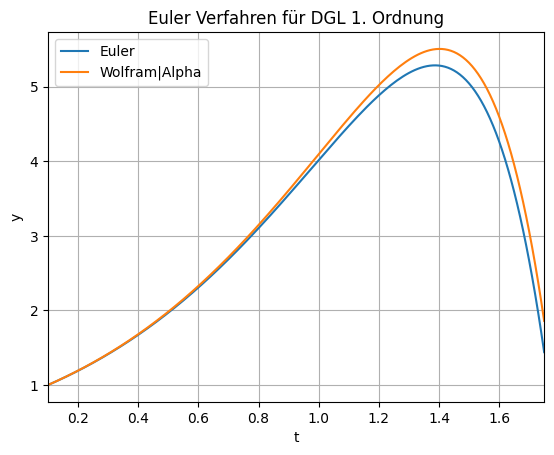

In [5]:
y_wolframalpha = np.exp(2 * t) - 0.164019 * np.exp(3 * t)

plt.plot(t, y, label="Euler")
plt.plot(t, y_wolframalpha, label="Wolfram|Alpha")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler Verfahren für DGL 1. Ordnung")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()


### Aufgabe 2: SciPy Funktionen

#### a) Übersicht

Hir ist eine Übersicht der [SciPy Funktionen zur Lösung von Differentialgleichungssystemen](https://docs.scipy.org/doc/scipy/reference/integrate.html#solving-initial-value-problems-for-ode-systems).

- Die Funktion [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) kann als Einstiegspunkt für alle Methoden verwenden werden.
- Die Funktion [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) wird zwar noch in vielen Blogpost und Tutorials verwendet, ist aber etwas veraltet und sollte im Normalfall nicht mehr verwendet werden.
- Ein Vergleich der beiden Funktionen findet sich zum Beispiel in diesem [Blogpost](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/).

Schaue dir die Dokumentation der Funktion `solve_ivp`, vor allem das erste Beispiel.

Beachte dabei, dass `solve_ivp` darauf ausgelegt ist, dass $y(t)$ eine mehrdimensionale (vektorwertige) Funktion ist. Das heisst, der Anfangswert `y0` ist ein Array (oder eine Liste) von Anfangswerten für jede Dimension. Und die resultierenden $y$-Werte sind in 2D-Array gespeichert, pro Zeitpunkt eine Spalte.

#### b) Anwendung

Löse die Differentialgleichung aus Aufgabe 1 mit SciPy und vergleiche das Ergebnis visuell mit demjenigen aus Aufgabe 1, also mit einer grafischen Darstellung.

Damit es einen sinnvollen Vergleich gibt, musst du mit der Option `t_eval=t` die $t$-Werte angeben, an denen die Lösung berechnet werden soll.

In [6]:
sol = scipy.integrate.solve_ivp(f, t_span=(t0, t.max()), y0=[y0], t_eval=t)
sol


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e-01  1.100e-01 ...  1.740e+00  1.750e+00]
        y: [[ 1.000e+00  1.018e+00 ...  2.140e+00  1.872e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0

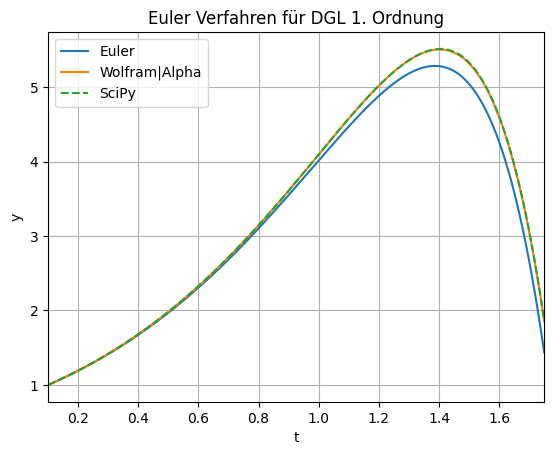

In [7]:
plt.plot(t, y, label="Euler")
plt.plot(t, y_wolframalpha, label="Wolfram|Alpha")
plt.plot(sol.t, sol.y[0], "--", label="SciPy")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler Verfahren für DGL 1. Ordnung")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()


#### c) Fehlerabschätzung

Plotte den absoluten Fehler der Ergebnisse des Euler-Verfahrens (selbstgeschriebene Funktion) bzw. der SciPy Funktion verglichen mit der analytischen Lösung von Wolfram|Alpha.

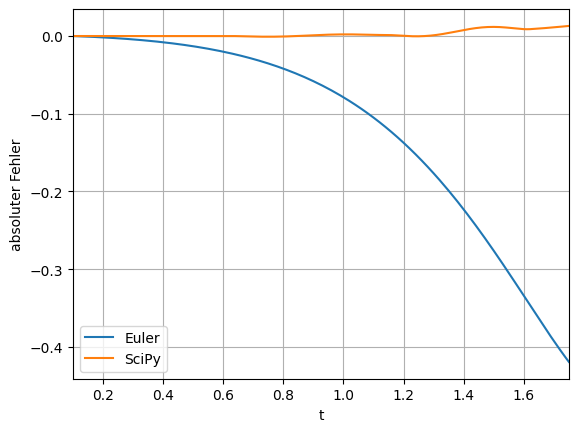

In [8]:
euler_error = y - y_wolframalpha
scipy_error = sol.y[0] - y_wolframalpha
plt.plot(t, euler_error, label="Euler")
plt.plot(t, scipy_error, label="SciPy")
plt.xlabel("t")
plt.ylabel("absoluter Fehler")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()


Und stelle noch den relativen Fehler der SciPy-Lösung dar.

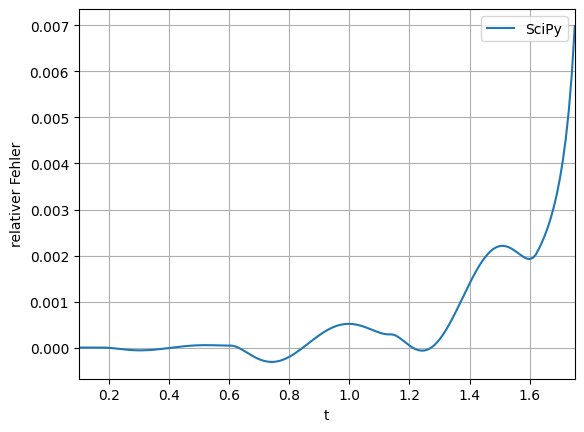

In [11]:
plt.plot(t, scipy_error / y_wolframalpha, label="SciPy")
plt.xlabel("t")
plt.ylabel("relativer Fehler")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()

### Aufgabe 3: Differentialgleichungen höherer Ordnung

Mit dem Euler-Verfahren und mit `solve_ivp` können nur DGL 1. Ordnung, also Differentialgleichungen mit höchstens einer Ableitung, gelöst werden.

Wie berechnet man Lösungen von Differentialgleichungen höhrerer Ordnung, also solche in denen zweite und höhere Ableitungen vorkommen?

Das Video ["12E.1 Differentialgleichung dritter Ordnung mit Euler-Verfahren lösen" - Jörn Loviscach](https://www.youtube.com/watch?v=1DrsSjvfyJA) hilft dabei diese Frage zu beantworten und wird weiterführend im Unterricht besprochen.